In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, mean_squared_error

### Lasso Regressor : x -> y

In [2]:
dataset = load_diabetes()
data = dataset['data']


In [3]:
x = data
y = dataset['target']
feature_names = dataset['feature_names']

In [4]:
print(x.shape)

(442, 10)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
w = []
r2 = []
alpha_list = [0, 0.1, 0.5, 2]

for alpha in alpha_list:
    # fit model
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)

    # prediction
    y_pred = model.predict(x_test)

    # store metrics for prediction, for each fit
    r2.append(r2_score(y_test, y_pred))
    w.append(model.coef_.tolist())

C:\Users\Pallavi.Saxena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Pallavi.Saxena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pallavi.Saxena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.113e+05, tolerance: 2.118e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted

In [7]:
print(model.coef_)

[ 0.         -0.         81.43877616  0.          0.          0.
 -0.          0.          0.          0.        ]


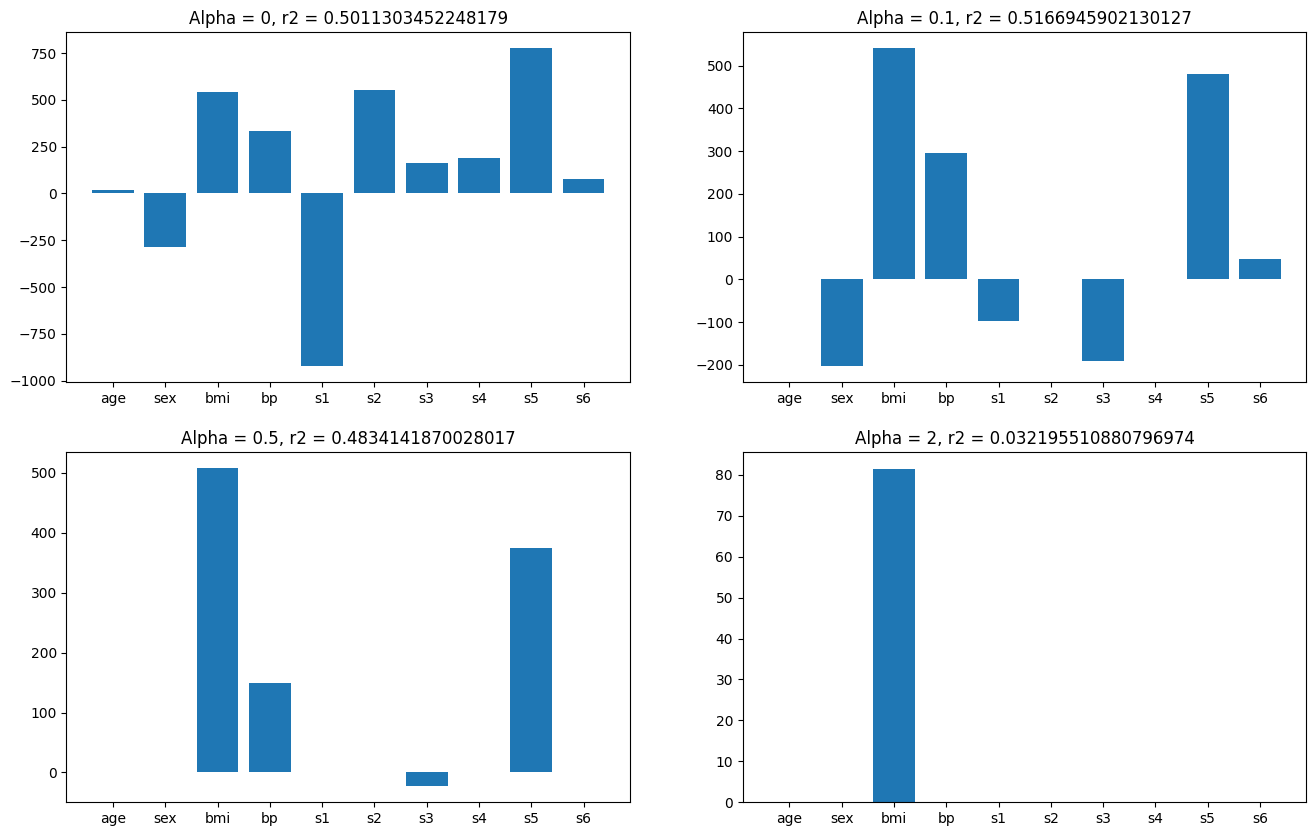

In [8]:
# Visualise Feature Selection

plt.figure(figsize=(16, 10))

for i in range(len(alpha_list)):
  plt.subplot(2, 2, i+1)
  plt.bar(feature_names, w[i])
  plt.title('Alpha = {}, r2 = {}'.format(alpha_list[i], r2[i]))

plt.show()

### Assignment ###

In [28]:
# 1. Perform the above task for the California Housing Dataset. Find out -
# a. the top 3 most important features
# b. after removing how many features does the r2_score begin to drop?
# c. visualize the above task with ridge regularisation - confirm that feature selection doesn't take place.

In [26]:
# 2. Compare with SVM Regressor, KNN-Regressor, Lasso Regressor
# Report the R2 Scores of each
# SVM Regressor: https://scikit-learn.org/stable/modules/svm.html#regression
# KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor
# Lasso Regressor: https://scikit-learn.org/stable/modules/linear_model.html#lasso